<a href="https://colab.research.google.com/github/SallyPosey/datasets/blob/main/AvocadosOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUKEY METHOD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
# Replace 'your_dataset.csv' with the actual name of your uploaded file
df = pd.read_csv('avocado.csv')

# Handle missing values if necessary (similar to your example)
df = df.dropna()

In [7]:
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df['AveragePrice']

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


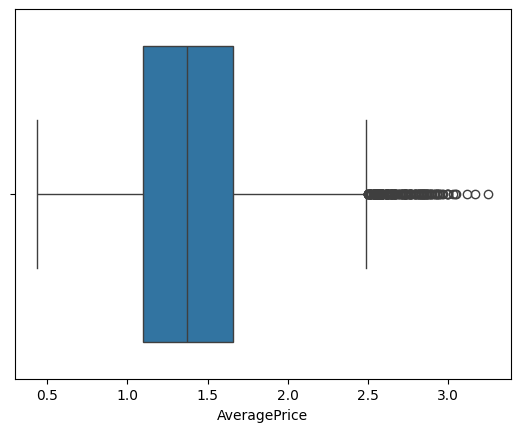

In [13]:
sns.boxplot(x = df['AveragePrice'])
plt.show()

<ipython-input-17-76f37d89dc80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AveragePrice'], bins = 8, kde=True)


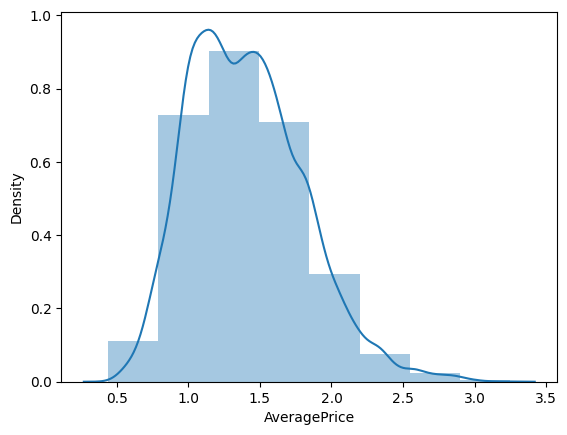

In [17]:
sns.distplot(df['AveragePrice'], bins = 8, kde=True)
plt.show()

In [29]:
# IQR = Q3 - Q1
# Q3 + 1.1*IQR
# Q1 - 1.1*IQR

df[['AveragePrice']].describe()

,AveragePrice
count,18249.000000
mean,1.405978
std,0.402677
min,0.440000
25%,1.100000
50%,1.370000
75%,1.660000
max,3.250000


In [30]:
df['AveragePrice'].quantile(0.25)

1.1

In [31]:
df['AveragePrice'].quantile(0.75)

1.66

In [21]:
Q1 = df['AveragePrice'].quantile(0.25)
Q3 = df['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.5599999999999998

In [32]:
lower_lim = Q1 - 1.1*IQR
upper_lim = Q3 + 1.1*IQR
lower_lim, upper_lim

(0.4840000000000002, 2.276)

In [33]:
# Filter for values below the lower limit
outliers_15_low = df[df['AveragePrice'] < lower_lim]

# Sort by 'AveragePrice' in ascending order
outliers_15_low_sorted = outliers_15_low.sort_values(by=['AveragePrice'])

# Select the lowest 15 values
lowest_15_below_lower_lim = outliers_15_low_sorted.head(15)

# Display the table of lowest 15 values below lower_lim
print(lowest_15_below_lower_lim[['AveragePrice']])

       AveragePrice
15261          0.44
7412           0.46
15473          0.48


Adjusted my formula to make lower outliers available for my analysis. (1.5 is now 1.1) which gives me 3 (yet not the 15 I was looking for) outliers below the lower_lim


In [45]:
# Sort by 'AveragePrice' in descending order
df_sorted = df.sort_values(by=['AveragePrice'], ascending=False)

# Filter for values above the upper limit and select the highest 15
highest_15_above_upper_lim = df_sorted[df_sorted['AveragePrice'] > upper_lim].head(15)

# Display the table of highest 15 values above upper_lim
display(highest_15_above_upper_lim[['AveragePrice']])

,AveragePrice
14125,3.25
17428,3.17
14124,3.12
16055,3.05
16720,3.04
13037,3.03
16715,3.00
16985,3.00
14123,2.99
15814,2.99


In [55]:
#Still cant figure out how to get the line in my table without
#printing a line betwen two tables, but here is a table showing
#the lowest three outliers, then the highest 5 outliers

# Select the lowest 5 values from lowest_15_below_lower_lim
lowest_5_below_lower_lim = lowest_15_below_lower_lim.head(5)

# Select the highest 5 values from highest_15_above_upper_lim
highest_5_above_upper_lim = highest_15_above_upper_lim.head(5)

# Concatenate the two DataFrames to create the final table
outliers_table = pd.concat([lowest_5_below_lower_lim, highest_5_above_upper_lim])

# Reset the index for a clean table view
outliers_table = outliers_table.reset_index(drop=True)

# Display the table with all columns
outliers_table

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,43,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton
1,47,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson
2,43,2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit
3,8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.00,organic,2016,SanFrancisco
4,37,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa
5,7,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
6,42,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
7,18,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro


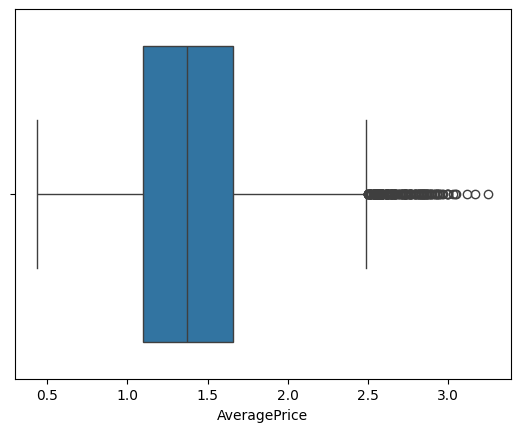

In [56]:
sns.boxplot(x=df['AveragePrice'])
plt.show()

# WINSORIZE METHOD

In [ ]:
# Definition: take anything that is an "outlier" and replace with a value within the acceptable range

In [59]:
# Load the dataset using pd.read_csv
df = pd.read_csv('avocado.csv')

# Now you can work with the DataFrame 'df'
# For example, you can access a specific column:
df['AveragePrice']

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


<Axes: xlabel='AveragePrice'>

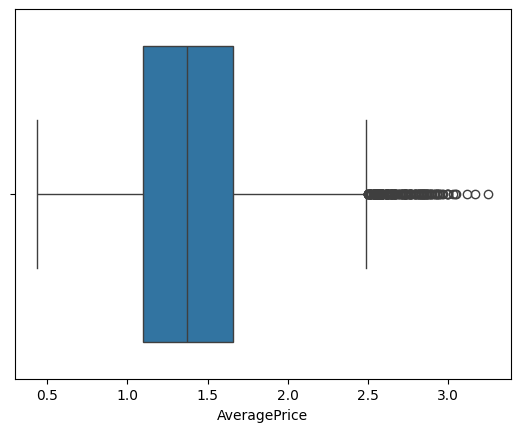

In [60]:
sns.boxplot(x=df['AveragePrice'])

In [62]:
from scipy.stats.mstats import winsorize
upper_lim, lower_lim

(2.276, 0.4840000000000002)

In [63]:
# Take the bottom 1% --- in other words - 99% of the values are above this point ... so anything below this is an extreme outlier
df['AveragePrice'].quantile(0.01)

0.67

In [64]:
#now I want the top 2% - so 98% of values are below this poit
df['AveragePrice'].quantile(0.98)

2.34

In [67]:
# how do we treat outliers with the winsorization method
df_table_win = winsorize(df['AveragePrice'],(0.01,0.02))
# lower boundary 1% - upper boundary 1-0.02 or 98th percentile or higher
df_table_win

masked_array(data=[1.33, 1.35, 0.93, ..., 1.87, 1.93, 1.62],
             mask=False,
       fill_value=1e+20)

<Axes: >

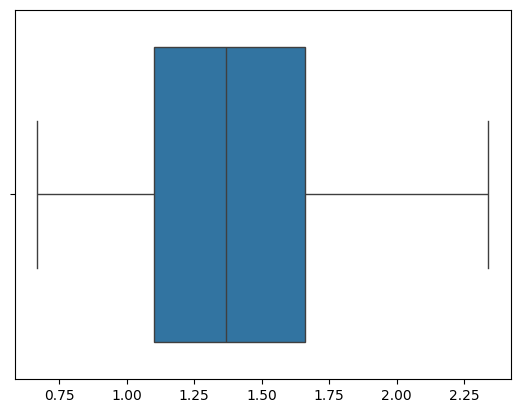

In [68]:
sns.boxplot(x=df_table_win)

In [69]:
df_table_win = pd.DataFrame(df_table_win)[0]
df_table_win.describe()

,0
count,18249.000000
mean,1.401928
std,0.388006
min,0.670000
25%,1.100000
50%,1.370000
75%,1.660000
max,2.340000


#LOG TRANSFORMATION

In [75]:
# Load the dataset using pd.read_csv
df = pd.read_csv('avocado.csv')

# Now you can work with the DataFrame 'df'
# For example, you can access a specific column:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<Axes: xlabel='Total Volume'>

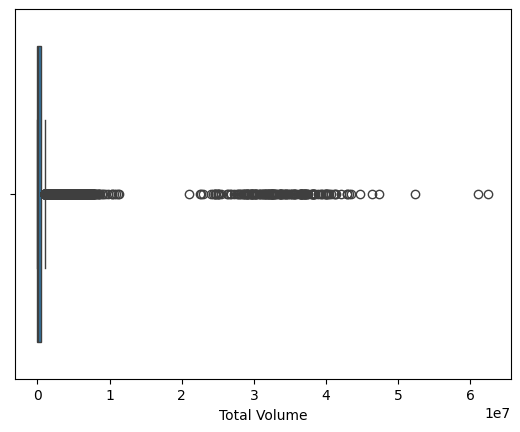

In [76]:
#Now I'm gonna look at something other than AveragePrice
#I'm gonna go with the column totalvolume since those are much larger numbers
#and log transformations reduce large numbers

sns.boxplot(x=df['Total Volume'])

#Yikes it looks awful hopefully the log transformatio helps, if not, I'm
#going to choose a different column to analyze

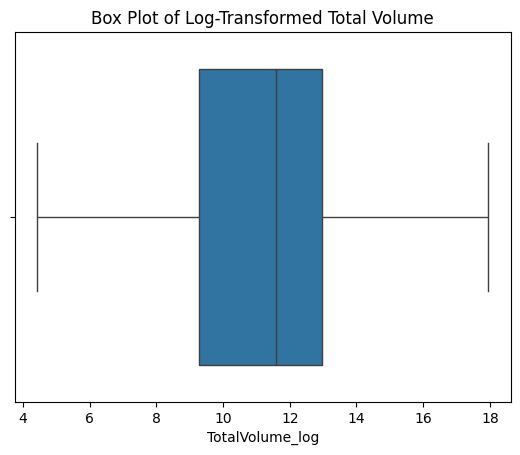

In [79]:
# 2. Perform the log transformation on 'Total Volume'
df['TotalVolume_log'] = np.log(df['Total Volume'])  # Create a new column

# 3. Create the box plot using seaborn
sns.boxplot(x='TotalVolume_log', data=df)  # Use the new column
plt.title('Box Plot of Log-Transformed Total Volume')
plt.show()

#WOW that looks crazy different

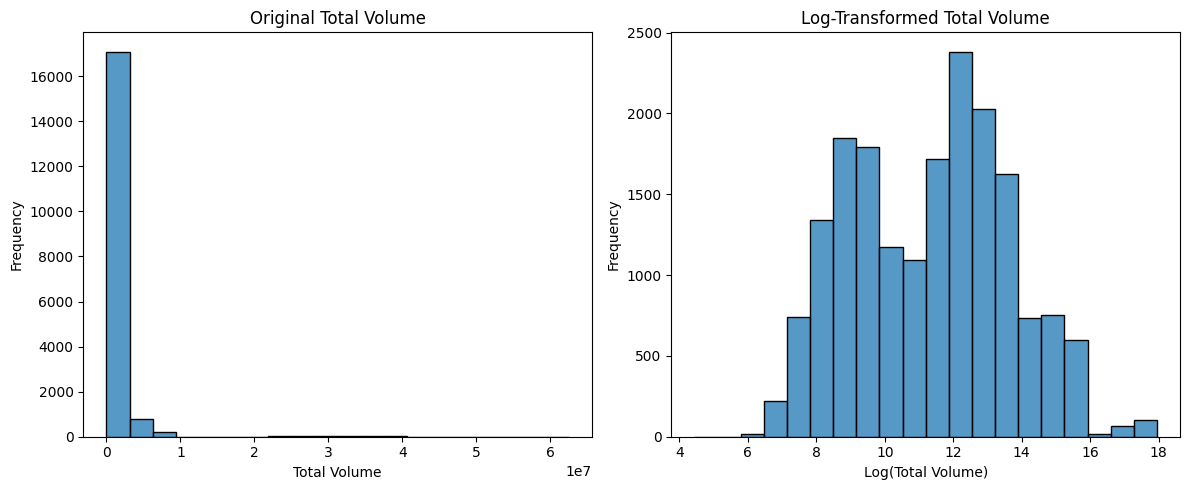

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your data
df = pd.read_csv('avocado.csv')

# 2. Create the first histogram (original data)
plt.figure(figsize=(12, 5))  # Adjust figure size if needed
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, first plot)
sns.histplot(df['Total Volume'], bins=20, kde=False)  # Histogram of original data
plt.title('Original Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')

# 3. Perform log transformation and create the second histogram
df['TotalVolume_log'] = np.log(df['Total Volume'])
plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(df['TotalVolume_log'], bins=20, kde=False)  # Histogram of log-transformed data
plt.title('Log-Transformed Total Volume')
plt.xlabel('Log(Total Volume)')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#WOW the log transformaton normalized the data majorly

# Z-SCORES

In [81]:
# Used to identify extreme outliers but keep them
#Anything further than 3 std dev from the mean is considered an outlier

#I'm going to get some basic stats

df[['AveragePrice']].describe()

,AveragePrice
count,18249.000000
mean,1.405978
std,0.402677
min,0.440000
25%,1.100000
50%,1.370000
75%,1.660000
max,3.250000


In [86]:
#Showing a table of extremem outliers identified with the z-score

# 1. Calculate the Z-scores for 'AveragePrice'
df['AveragePrice_zscore'] = (df['AveragePrice'] - df['AveragePrice'].mean()) / df['AveragePrice'].std()

# 2. Filter for outliers (Z-score > 3 or Z-score < -3)
outliers = df[(df['AveragePrice_zscore'] > 3) | (df['AveragePrice_zscore'] < -3)]

# 3. Select and display 'Date', and 'AveragePrice' columns for outliers
print(outliers[['Date', 'AveragePrice']])

             Date  AveragePrice
11320  2015-10-18          2.79
11321  2015-10-11          2.66
11323  2015-09-27          2.74
11324  2015-09-20          2.79
11325  2015-09-13          2.73
...           ...           ...
17302  2017-09-03          2.81
17303  2017-08-27          2.84
17304  2017-08-20          2.64
17402  2017-10-15          2.70
17428  2017-04-16          3.17

[131 rows x 2 columns]


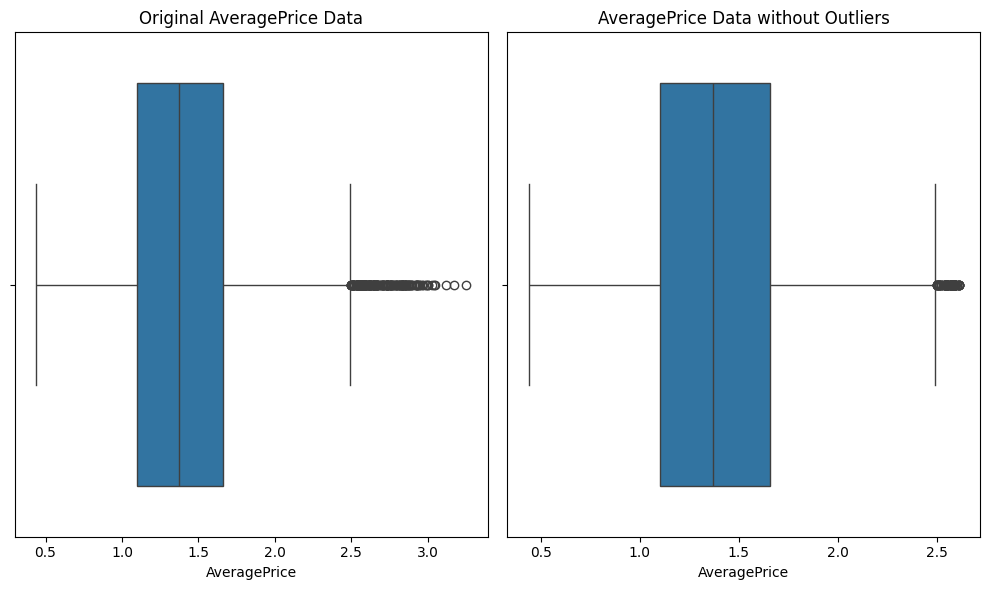

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'df' with 'AveragePrice' column

# 1. Calculate the Z-scores for 'AveragePrice'
df['AveragePrice_zscore'] = (df['AveragePrice'] - df['AveragePrice'].mean()) / df['AveragePrice'].std()

# 2. Create a DataFrame without outliers
df_no_outliers = df[(df['AveragePrice_zscore'] <= 3) & (df['AveragePrice_zscore'] >= -3)]

# 3. Create side-by-side box plots
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Subplot for original data
sns.boxplot(x=df['AveragePrice'])
plt.title('Original AveragePrice Data')

plt.subplot(1, 2, 2)  # Subplot for data without outliers
sns.boxplot(x=df_no_outliers['AveragePrice'])
plt.title('AveragePrice Data without Outliers')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

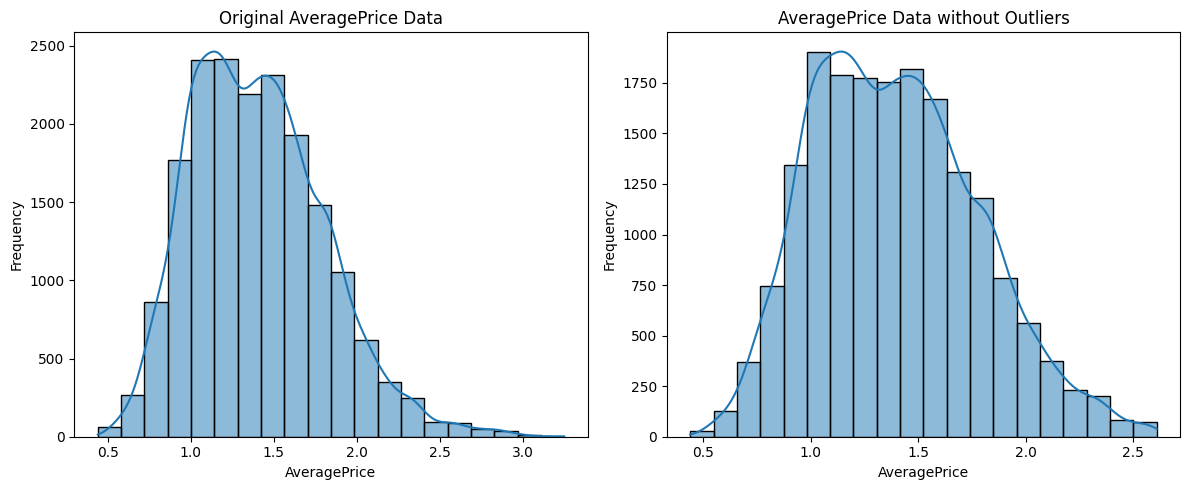

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced histograms

# Assuming you have your DataFrame 'df' with 'AveragePrice' column

# 1. Calculate the Z-scores for 'AveragePrice'
df['AveragePrice_zscore'] = (df['AveragePrice'] - df['AveragePrice'].mean()) / df['AveragePrice'].std()

# 2. Create a DataFrame without outliers
df_no_outliers = df[(df['AveragePrice_zscore'] <= 3) & (df['AveragePrice_zscore'] >= -3)]

# 3. Create side-by-side histograms
plt.figure(figsize=(12, 5))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Subplot for original data
sns.histplot(df['AveragePrice'], bins=20, kde=True)  # Histogram of original data
plt.title('Original AveragePrice Data')
plt.xlabel('AveragePrice')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Subplot for data without outliers
sns.histplot(df_no_outliers['AveragePrice'], bins=20, kde=True)  # Histogram of data without outliers
plt.title('AveragePrice Data without Outliers')
plt.xlabel('AveragePrice')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#It does look slightly more normal

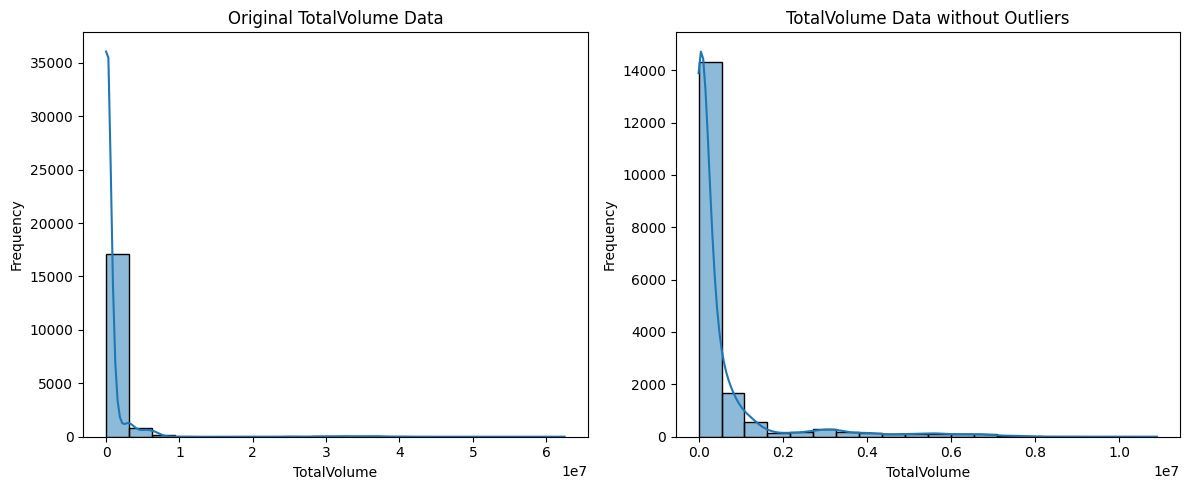

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your DataFrame 'df' with 'TotalVolume' column

# 1. Calculate the Z-scores for 'TotalVolume'
df['TotalVolume_zscore'] = (df['Total Volume'] - df['Total Volume'].mean()) / df['Total Volume'].std()

# 2. Create a DataFrame without outliers
df_no_outliers = df[(df['TotalVolume_zscore'] <= 3) & (df['TotalVolume_zscore'] >= -3)]

# 3. Create side-by-side histograms
plt.figure(figsize=(12, 5))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Subplot for original data
sns.histplot(df['Total Volume'], bins=20, kde=True)  # Histogram of original data
plt.title('Original TotalVolume Data')
plt.xlabel('TotalVolume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Subplot for data without outliers
sns.histplot(df_no_outliers['Total Volume'], bins=20, kde=True)  # Histogram of data without outliers
plt.title('TotalVolume Data without Outliers')
plt.xlabel('TotalVolume')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#This is not nearly as useful for the TotalVolume Column